https://programmers.co.kr/learn/courses/30/lessons/42576

해쉬 관련 내용이다. 

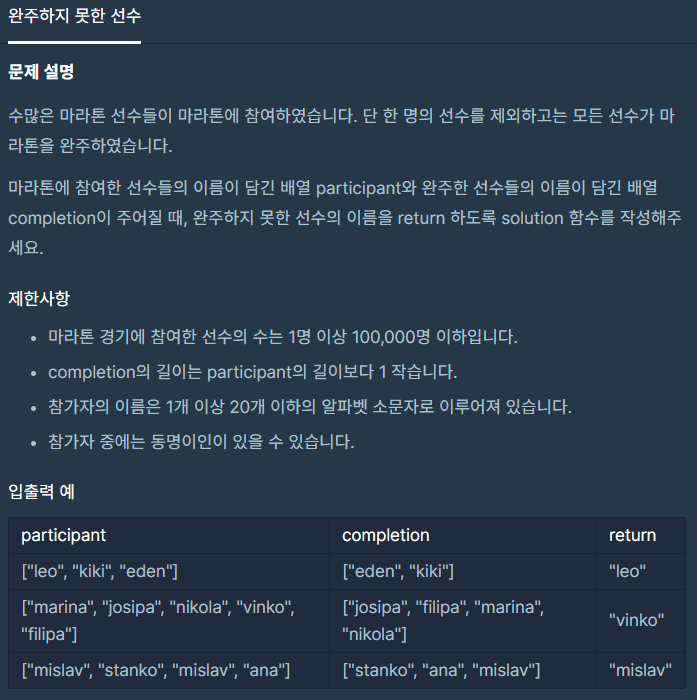

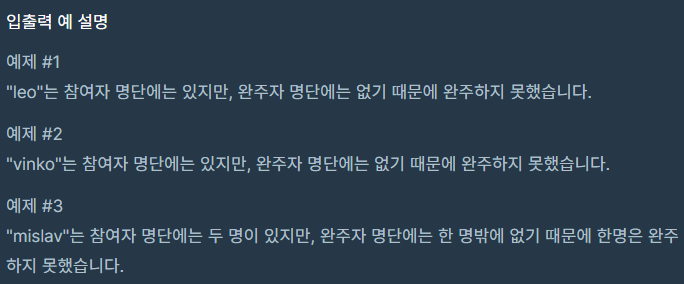

아래와 같이 작성 했지만, 정확도 테스트는 넘어갔지만, 효율성 테스트는 넘어가지 못했다.
즉, hash 를 사용해서 풀어야 한다는 이야기이다. 

In [1]:
def solution(participant, completion):
    for i in participant:
        try:
            completion.remove(i)
        except:
            return i

In [5]:
participant = ["leo", "kiki", "eden"]
completion = ["eden", "kiki"]

In [ ]:
participant = ["marina", "josipa", "nikola", "vinko", "filipa"]
completion = ["josipa", "filipa", "marina", "nikola"]

In [ ]:
participant = ["mislav", "stanko", "mislav", "ana"]
completion = ["stanko", "ana", "mislav"]

코드 1 

출처 : https://velog.io/@vvakki_/%ED%94%84%EB%A1%9C%EA%B7%B8%EB%9E%98%EB%A8%B8%EC%8A%A4-%ED%95%B4%EC%8B%9C-%EC%99%84%EC%A3%BC%ED%95%98%EC%A7%80-%EB%AA%BB%ED%95%9C-%EC%84%A0%EC%88%98

In [3]:
import collections

In [6]:
collections.Counter(participant)

Counter({'leo': 1, 'kiki': 1, 'eden': 1})

In [4]:
p_list = OrderedDict()

In [7]:
collections.Counter(completion)

Counter({'eden': 1, 'kiki': 1})

In [9]:
answer = collections.Counter(participant) - collections.Counter(completion)

In [10]:
answer

Counter({'leo': 1})

In [13]:
answer.keys()

dict_keys(['leo'])

In [14]:
list(answer.keys())

['leo']

In [15]:
list(answer.keys())[0]

'leo'

In [16]:
import collections

def solution(participant, completion):
    answer = collections.Counter(participant) - collections.Counter(completion)
    return list(answer.keys())[0]

코드 2


In [18]:
hash(participant[1])

-1102388536166726517

In [19]:
hash(completion[1])

-1102388536166726517

In [21]:
participant = ["mislav", "stanko", "mislav", "ana"]
completion = ["stanko", "ana", "mislav"]

In [23]:
c_list = {}
temp = 0 
for i in participant:
    c_list[hash(i)]= i
    temp += int(hash(i))
print(c_list)
print(temp)

{-7634209843911215174: 'mislav', -4672999087831463788: 'stanko', -9008055245137633127: 'ana'}
-28949474020791527263


In [24]:
for i in completion:
    temp -= int(hash(i))
print(temp)

-7634209843911215174


In [25]:
c_list[temp]

'mislav'

In [26]:
def solution(participant, completion):
    answer = ''
    temp = 0
    dic = {}
    for part in participant:
        dic[hash(part)] = part
        temp += int(hash(part))
    for com in completion:
        temp -= hash(com)
    answer = dic[temp]

    return answer

code3

In [ ]:
def solution(participant, completion):
    participant.sort()
    completion.sort()
    for i in range(len(completion)):
        if participant[i] != completion[i]:
            return participant[i]
    return participant[len(participant)-1]

왜 내 코드중에서 아래와 같이 수정 했더니 효율성 테스트에서 23실패 145 성공

In [31]:
def solution(participant, completion):
    participant.sort()
    completion.sort()
    for i in participant:
        try:
            completion.remove(i)
        except:
            return i

In [37]:
participant = ["mislav", "stanko", "mislav", "ana"]
completion = ["stanko", "ana", "mislav"]
print(solution(participant, completion))

mislav


In [41]:
participant = ["mislav", "stanko", "mislav", "ana"]
completion = ["stanko", "ana", "mislav"]
participant.sort()
completion.sort()

In [42]:
participant

['ana', 'mislav', 'mislav', 'stanko']

In [43]:
completion

['ana', 'mislav', 'stanko']

## 동명 2인만 빼서 만들어 주고, 나머지는 set diff로 가자.

In [48]:
p_same = []
c_same = []
for i, part in enumerate(participant):
    if i>=1 and participant[i-1]==participant[i]:
        p_same.append(part)
        
for i, part in enumerate(completion):
    if i>=1 and completion[i-1]==completion[i]:
        c_same.append(part)
        
print(p_same)

[]


In [49]:
participant = ["leo", "kiki", "eden"]
completion = ["eden", "kiki"]
answer1 = list(set(participant).difference(set(completion)))

In [50]:
answer2 = list(set(p_same).difference(set(c_same)))

In [51]:
def solution(partcipant, completion):
    participant.sort()
    completion.sort()
    
    p_same = []
    c_same = []
    for i, part in enumerate(participant):
        if i>=1 and participant[i-1]==participant[i]:
            p_same.append(part)

    for i, part in enumerate(completion):
        if i>=1 and completion[i-1]==completion[i]:
            c_same.append(part)
            
    answer1 = list(set(participant).difference(set(completion)))
    answer2 = list(set(p_same).difference(set(c_same)))
    
    if answer1!=[]:
        return answer1[0]
    else:
        return answer2[0]
    
    # 정확도 2 번 런타임 실패, 효율성 5번 런타임 실패

SyntaxError: invalid syntax (<ipython-input-51-566b23dfe15b>, line 18)

## 내가 작성 코드 3 

In [77]:
def solution(participant, completion):
    participant.sort()
    completion.sort()
    
    for a , b in zip(participant, completion):
        if a!=b:
            return a

    return participant[-1]


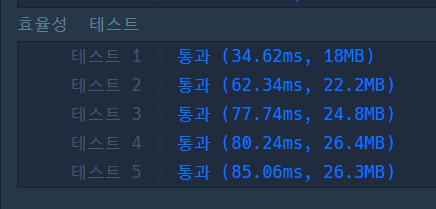

In [73]:
def solution(participant, completion):   
    for a , b in zip(sorted(participant), sorted(completion)):
        if a!=b:
            return a
    return sorted(participant)[-1]

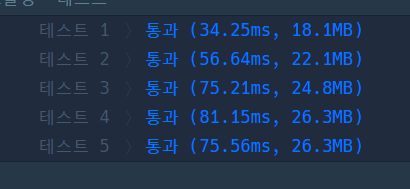

In [74]:
participant = ["leo", "kiki", "eden"]
completion = ["eden", "kiki"]

In [75]:
print(solution(participant,completion))

leo


In [76]:
for a, b in zip(range(4),range(3)):
    print(a, b)

0 0
1 1
2 2
